/workspace/AdBRC/tszhang/anaconda3/envs/py39/lib/python3.9/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


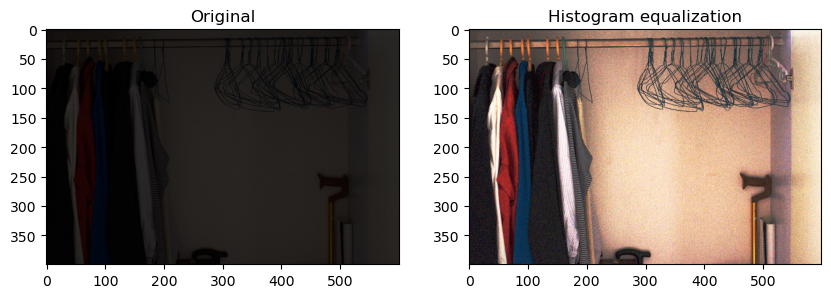

In [2]:
import matplotlib.pyplot as plt
from skimage import io, exposure

# Load RGB image
image = io.imread('./low/146.png')

# Apply histogram equalization to each color channel separately
image_eq = exposure.equalize_hist(image, nbins=256)

# Display the original and the equalized image
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(image_eq)
ax[1].set_title('Histogram equalization')
plt.show()

In [115]:
image_eq.shape

(400, 600, 3)

In [3]:
#calculate PSNR, SSIM
from skimage import io, metrics

# Load the original and reconstructed images
img_original = io.imread('./high/1.png')
img_reconstructed = image_eq*255

# Calculate PSNR
psnr = metrics.peak_signal_noise_ratio(img_original, img_reconstructed)

# Calculate SSIM
ssim = metrics.structural_similarity(img_original, img_reconstructed, multichannel=True)

# Print the results
print(f"PSNR: {psnr:.2f}")
print(f"SSIM: {ssim:.2f}")

PSNR: 8.21
SSIM: 0.12


/tmp/ipykernel_2818131/843476037.py:9: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = metrics.peak_signal_noise_ratio(img_original, img_reconstructed)
/tmp/ipykernel_2818131/843476037.py:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = metrics.structural_similarity(img_original, img_reconstructed, multichannel=True)
/workspace/AdBRC/tszhang/anaconda3/envs/py39/lib/python3.9/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


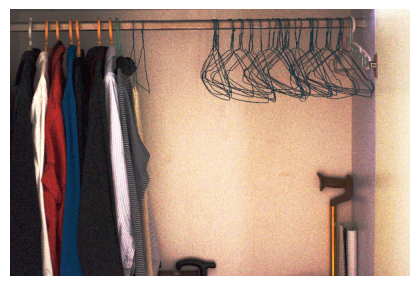

In [3]:
plt.imshow(image_eq)
plt.axis('off')
fig = plt.gcf()

fig.set_size_inches(12/3,8.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
fig.savefig('./LLEsample/493_he.png', format='png', transparent=True, dpi=150, pad_inches = 0)

# lolv2 syn visual

In [3]:
img = io.imread('./LLEsample/lolv2syn_11.png')
img_snr = io.imread('./LLEsample/lolv2syn_11_snr.png')
img_gt = io.imread('./LLEsample/lolv2syn_11_gt.png')
img_ours = io.imread('./LLEsample/lolv2syn_11_ours.png')
img_llformer = io.imread('./LLEsample/lolv2syn_11_llformer.png')
img_idt = io.imread('./LLEsample/lolv2syn_11_idt.png')

(-0.5, 383.5, 383.5, -0.5)

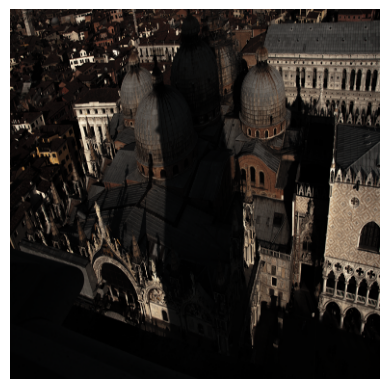

In [5]:
plt.imshow(img)
plt.axis('off')

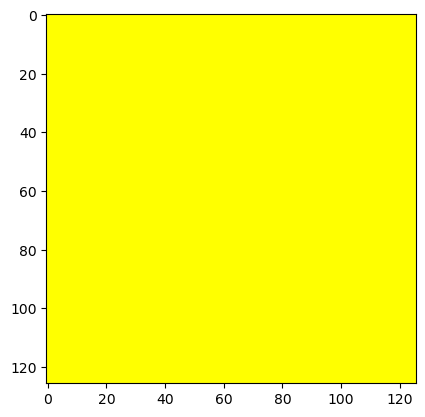

In [6]:
size = 128
capture = img[101:100+size-1, 101:100+size-1, :]
img[100:100+size, 101:100+size, :] = [255, 255, 0]
plt.imshow(img[101:100+size-1, 101:100+size-1, :])

In [5]:
from matplotlib.patches import Rectangle
from skimage.transform import resize, rescale
from PIL import Image
import numpy as np
def plot(x1, y1, x2, y2, x3, y3, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 64, 64, edgecolor='r',  
                        facecolor='none')
    patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
                        facecolor='none')
    patch3 = Rectangle((x3, y3), 64, 64, edgecolor='b', 
                        facecolor='none')

    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    
    red = img[y1:y1+64, x1:x1+64, :]
    green = img[y2:y2+64, x2: x2+64, :]
    blue = img[y3:y3+64, x3:x3+64, :]
    red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
                       anti_aliasing=True)
    
    green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
                       anti_aliasing=True)
    blue = resize(blue, (blue.shape[0] // 0.5, blue.shape[1] // 0.5),
                       anti_aliasing=True)

    out = np.vstack([img/255, np.hstack([red, green, blue])])
    ax.add_patch(Rectangle((0, 384), 127,127, edgecolor='r',  
                        facecolor='none'))
    ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
                        facecolor='none'))
    ax.add_patch(Rectangle((256, 384), 127,127, edgecolor='b',  
                        facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(9.0/3,12.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out
#     myfig = plt.gcf()
#     myfig.tight_layout()
# #     fig.savefig('./detailed.png') # (255*out).astype(np.uint8)
#     myfig.savefig('./detailed.png', dpi=300)
out = plot(100, 100, 300, 50, 300, 190, img_llformer)

NameError: name 'img_llformer' is not defined

In [5]:
def plot3(x1, y1,  x3, y3, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 64, 64, edgecolor='r',  linewidth =3,
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
    patch3 = Rectangle((x3, y3), 64, 64, edgecolor='b', linewidth =3,
                        facecolor='none')

    ax.add_patch(patch1)
#     ax.add_patch(patch2)
    ax.add_patch(patch3)
    
    red = img[y1:y1+64, x1:x1+64, :]
#     green = img[y2:y2+64, x2: x2+64, :]
    blue = img[y3:y3+64, x3:x3+64, :]
    red = resize(red, (red.shape[0] // (1/3), red.shape[1] //(1/3)),
                       anti_aliasing=True)
    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
    blue = resize(blue, (blue.shape[0] // (1/3), blue.shape[1] // (1/3)),
                       anti_aliasing=True)

    out = np.hstack([img/255, np.vstack([red,  blue])])
    ax.add_patch(Rectangle((383, 0), 191,191, edgecolor='r',  linewidth =2,
                        facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
    ax.add_patch(Rectangle((383, 192), 191,191, edgecolor='b',  linewidth =2,
                        facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(9.0/3,6.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out
out = plot3(250, 70, 50, 160, img_978t)

NameError: name 'img_978t' is not defined

# lolv1 and v2real visual

In [6]:
img_432t_ours = io.imread('./LLEsample2/432t_ours.png')
img_432t_snr =  io.imread('./LLEsample2/432t_snr.png')
img_432t_rft = io.imread('./LLEsample2/432t_rft.png')

img_c1t_rft = io.imread('./LLEsample2/c1t_rft.png')
img_c1t_ours =  io.imread('./LLEsample2/c1t_ours.png')
img_c1t_snr = io.imread('./LLEsample2/c1t_snr.png')
img_c1t_gt = io.imread('./LLEsample2/c1t_gt.png')
img_c1t = io.imread('./LLEsample2/c1t.png')



In [7]:
img_493 = io.imread('./LLEsample/v1_493.png')
img_493_snr = io.imread('./LLEsample/v1_493_snr.png')
img_493_ours = io.imread('./LLEsample/v1_493_ours.png')
img_493_ruas = io.imread('./LLEsample/v1_493_ruas.png')
img_493_ne = io.imread('./LLEsample/v1_493_ne.png')
img_493_engan = io.imread('./LLEsample/v1_493_engan.png')
img_493_idt = io.imread('./LLEsample/v1_493_idt.png')
img_493_gt = io.imread('./LLEsample/v1_493_gt.png')
# img_493_sg = io.imread('./LLEsample/v1_493_sg.png')
img_493_llformer = io.imread('./LLEsample/v1_493_llformer.png')
img_493_zerodce = io.imread('./LLEsample/v1_493_zerodce.png')
img_493_mirnet = io.imread('./LLEsample/v1_493_mirnet.png')
# img_493_he = io.imread('./LLEsample/v1_493_he.png')

In [8]:
img_146 = io.imread('./LLEsample/v1_146.png')
img_146_snr = io.imread('./LLEsample/v1_146_snr.png')
img_146_ours = io.imread('./LLEsample/v1_146_ours.png')
img_146_ruas = io.imread('./LLEsample/v1_146_ruas.png')
img_146_ne = io.imread('./LLEsample/v1_146_ne.png')
img_146_engan = io.imread('./LLEsample/v1_146_engan.png')
img_146_idt = io.imread('./LLEsample/v1_146_idt.png')
img_146_gt = io.imread('./LLEsample/v1_146_gt.png')
# img_493_sg = io.imread('./LLEsample/v1_493_sg.png')
img_146_llformer = io.imread('./LLEsample/v1_146_llformer.png')
img_146_zerodce = io.imread('./LLEsample/v1_146_zerodce.png')
img_146_mirnet = io.imread('./LLEsample/v1_146_mirnet.png')

In [9]:
img_778 = io.imread('./LLEsample/v2_778.png')
img_778_gt = io.imread('./LLEsample/v2_778_gt.png')
img_778_ours = io.imread('./LLEsample/v2_778_ours.png')
img_778_snr = io.imread('./LLEsample/v2_778_snr.png')
img_778_lednet = io.imread('./LLEsample/v2_778_lednet.png')
img_778_sci = io.imread('./LLEsample/v2_778_sci.png')
img_778_zerodce = io.imread('./LLEsample/v2_778_zerodce.png')

In [10]:
img_714 = io.imread('./LLEsample/v2_714.png')
img_714_gt = io.imread('./LLEsample/v2_714_gt.png')
img_714_ours = io.imread('./LLEsample/v2_714_ours.png')
img_714_snr = io.imread('./LLEsample/v2_714_snr.png')
img_714_lednet = io.imread('./LLEsample/v2_714_lednet.png')
img_714_sci = io.imread('./LLEsample/v2_714_sci.png')
img_714_zerodce = io.imread('./LLEsample/v2_714_zerodce.png')

In [11]:
img_1 = io.imread('./LLEsample/v1_1.png')
img_1_gt = io.imread('./LLEsample/v1_1_gt.png')
img_1_unet = io.imread('./LLEsample/v1_1_unet.png')
img_1_uformer = io.imread('./LLEsample/v1_1_uformer.png')
img_1_unetplus = io.imread('./LLEsample/v1_1_unetplus.png')
img_1_ours = io.imread('./LLEsample/v1_1_ours.png')

img_1_snr = io.imread('./LLEsample/v1_1_snr.png')
img_1_he = io.imread('./LLEsample/v1_1_he.png')
img_1_idt = io.imread('./LLEsample/v1_1_idt.png')
img_1_llformer = io.imread('./LLEsample/v1_1_llformer.png')
img_1_mirnet = io.imread('./LLEsample/v1_1_mirnet.png')
img_1_ne = io.imread('./LLEsample/v1_1_ne.png')
img_1_zerodce = io.imread('./LLEsample/v1_1_zerodce.png')
img_1_engan = io.imread('./LLEsample/v1_1_engan.png')
img_1_ruas = io.imread('./LLEsample/v1_1_ruas.png')

In [12]:
img_773 = io.imread('./LLEsample/v2_773.png')
img_773_gt = io.imread('./LLEsample/v2_773_gt.png')
img_773_snr = io.imread('./LLEsample/v2_773_snr.png')
img_773_ours = io.imread('./LLEsample/v2_773_ours.png')
img_773_sci = io.imread('./LLEsample/v2_773_sci.png')
img_773_lednet = io.imread('./LLEsample/v2_773_lednet.png')
img_773_uformer = io.imread('./LLEsample/v2_773_uformer.png')
img_773_zerodce = io.imread('./LLEsample/v2_773_zerodce.png')

In [13]:
img_18t = io.imread('./LLEsample/v2_18t.png')
img_18t_gt = io.imread('./LLEsample/v2_18t_gt.png')
img_18t_ours = io.imread('./LLEsample/v2_18t_ours.png')
img_18t_snr = io.imread('./LLEsample/v2_18t_snr.png')
img_18t_idt = io.imread('./LLEsample/v2_18t_idt.png')
img_18t_llformer = io.imread('./LLEsample/v2_18t_llformer.png')

In [14]:
img_56t = io.imread('./LLEsample/56t.png')
img_56t_gt = io.imread('./LLEsample/56t_gt.png')
img_56t_ours = io.imread('./LLEsample2/56t_ours.png')
img_56t_snr = io.imread('./LLEsample2/56t_snr.png')
img_56t_rtf = io.imread('./LLEsample2/56t_rtf.png')
img_56t_idt = io.imread('./LLEsample/56t_idt.png')
img_56t_llformer = io.imread('./LLEsample/56t_llformer.png')

In [15]:
img_7d4t = io.imread('./LLEsample2/7d4t.png')
img_7d4t_gt = io.imread('./LLEsample2/7d4t_gt.png')
img_7d4t_ours = io.imread('./LLEsample2/7d4t_ours.png')
img_7d4t_snr = io.imread('./LLEsample2/7d4t_snr.png')
img_7d4t_rft = io.imread('./LLEsample2/7d4t_rft.png')
img_7d4t_idt = io.imread('./LLEsample2/7d4t_idt.png')
img_7d4t_uformer = io.imread('./LLEsample2/7d4t_uformer.png')
img_7d4t_llf = io.imread('./LLEsample2/7d4t_llf.png')

In [16]:
img_c1t = io.imread('./LLEsample2/c1t.png')
img_c1t_gt = io.imread('./LLEsample2/c1t_gt.png')
img_c1t_ours = io.imread('./LLEsample2/c1t_ours.png')
img_c1t_snr = io.imread('./LLEsample2/c1t_snr.png')
img_c1t_rft = io.imread('./LLEsample2/c1t_rft.png')
img_c1t_idt = io.imread('./LLEsample2/c1t_idt.png')
img_c1t_uformer = io.imread('./LLEsample2/c1t_uformer.png')
img_c1t_llf = io.imread('./LLEsample2/c1t_llf.png')

In [17]:
img_31et = io.imread('./LLEsample2/31et.png')
img_31et_gt = io.imread('./LLEsample2/31et_gt.png')
img_31et_ours = io.imread('./LLEsample2/31et_ours.png')
img_31et_snr = io.imread('./LLEsample2/31et_snr.png')
img_31et_rft = io.imread('./LLEsample2/31et_rft.png')
img_31et_idt = io.imread('./LLEsample2/31et_idt.png')
img_31et_uformer = io.imread('./LLEsample2/31et_uformer.png')
img_31et_llf = io.imread('./LLEsample2/31et_llf.png')

In [18]:
img_422t = io.imread('./LLEsample2/422t.png')
img_422t_gt = io.imread('./LLEsample2/422t_gt.png')
img_422t_ours = io.imread('./LLEsample2/422t_ours.png')
img_422t_snr = io.imread('./LLEsample2/422t_snr.png')
img_422t_rft = io.imread('./LLEsample2/422t_rft.png')
img_422t_idt = io.imread('./LLEsample2/422t_idt.png')
img_422t_uformer = io.imread('./LLEsample2/422t_uformer.png')
img_422t_llf = io.imread('./LLEsample2/422t_llf.png')

In [19]:
img_978t = io.imread('./LLEsample2/978t.png')
img_978t_gt = io.imread('./LLEsample2/978t_gt.png')
img_978t_ours = io.imread('./LLEsample2/978t_ours.png')
img_978t_snr = io.imread('./LLEsample2/978t_snr.png')
img_978t_rft = io.imread('./LLEsample2/978t_rft.png')
img_978t_idt = io.imread('./LLEsample2/978t_idt.png')
img_978t_uformer = io.imread('./LLEsample2/978t_uformer.png')
img_978t_llf = io.imread('./LLEsample2/978t_llf.png')

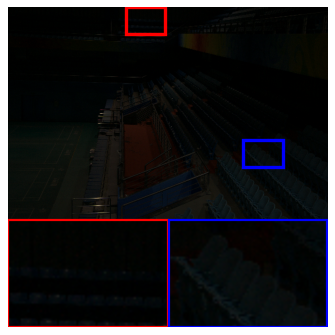

In [20]:
def plot_2block(x1, y1, x3, y3, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 75, 50, linewidth =3, edgecolor='r',  
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
    patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
                        facecolor='none')

    ax.add_patch(patch1)
#     ax.add_patch(patch2)
    ax.add_patch(patch3)
    
    red = img[y1:y1+50, x1:x1+75, :]
#     green = img[y2:y2+64, x2: x2+64, :]
    blue = img[y3:y3+50, x3:x3+75, :]
    red = resize(red, (red.shape[0] // 0.25, red.shape[1] // 0.25),
                       anti_aliasing=True)
    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
    blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
                       anti_aliasing=True)

    out = np.vstack([img/255, np.hstack([red, blue])])
    ax.add_patch(Rectangle((0, 400), 300, 200, edgecolor='r',  linewidth =2,
                        facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
    ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
                        facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(12.0/3,12.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out
out = plot_2block(220, 0, 440, 250, img_778)

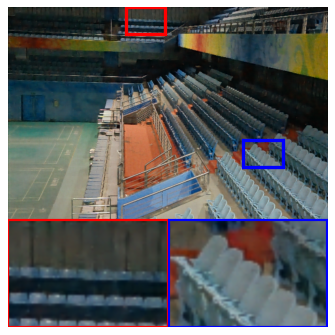

In [63]:
out = plot_2block(220, 0, 440, 250, img_778_ours)

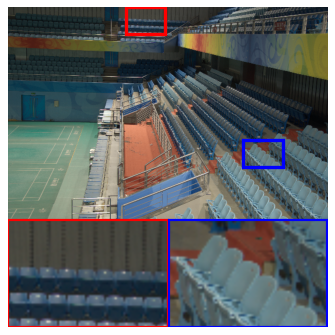

In [62]:
out = plot_2block(220, 0, 440, 250, img_778_gt)

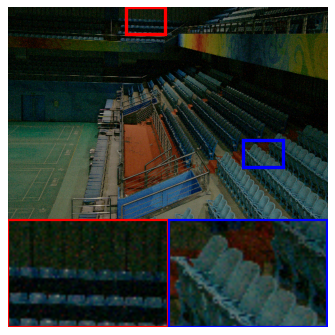

In [60]:
out = plot_2block(220, 0, 440, 250, img_778_zerodce)

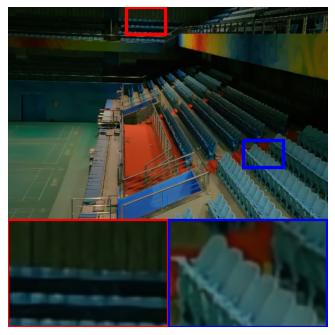

In [61]:
out = plot_2block(220, 0, 440, 250, img_778_lednet)

In [210]:
def plot2(x1, y1, x2, y2, x3, y3, img):
    cv2.imread(img)

    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    
    red = img[y1:y1+64, x1:x1+64, :]
    green = img[y2:y2+64, x2: x2+64, :]
    blue = img[y3:y3+64, x3:x3+64, :]
    red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
                       anti_aliasing=True)
    
    green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
                       anti_aliasing=True)
    blue = resize(blue, (blue.shape[0] // 0.5, blue.shape[1] // 0.5),
                       anti_aliasing=True)

    out = np.vstack([img/255, np.hstack([red, green, blue])])
    ax.add_patch(Rectangle((0, 384), 127,127, edgecolor='r',  
                        facecolor='none'))
    ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
                        facecolor='none'))
    ax.add_patch(Rectangle((256, 384), 127,127, edgecolor='b',  
                        facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')

In [21]:
img_22_cb5 = io.imread('./LLEsample_lolv1/22_cb5.png')
img_22_cb6 = io.imread('./LLEsample_lolv1/22_cb6.png')
img_22_gt = io.imread('./high/22.png')
img_22 = io.imread('./low/22.png')

img_79_nocb = io.imread('./LLEsample_lolv1/79_nocb.png')
img_79_cb5 = io.imread('./LLEsample_lolv1/79_cb5.png')
img_79_cb6 = io.imread('./LLEsample_lolv1/79_cb6.png')
img_79_gt = io.imread('./high/79.png')
img_79 = io.imread('./low/79.png')

img_780_llf = io.imread('./LLEsample_lolv1/780_llf.png')
img_780_engan = io.imread('./LLEsample_lolv1/780_engan.png')
img_780_rft = io.imread('./LLEsample_lolv1/780_rft.png')
img_780_sci = io.imread('./LLEsample_lolv1/780_sci.png')
img_780_uformer = io.imread('./LLEsample_lolv1/780_uformerT.png')
img_780_iat = io.imread('./LLEsample_lolv1/780_iat.png')
img_780_cheby = io.imread('./LLEsample_lolv1/780_cheby.png')
img_780_ruas = io.imread('./LLEsample_lolv1/780_ruas.png')
img_780_idt = io.imread('./LLEsample_lolv1/780_idt.png')
img_780_gt = io.imread('./high/780.png')
img_780 = io.imread('./low/780.png')


img_748_llf = io.imread('./LLEsample_lolv1/748_llf.png')
img_748_engan = io.imread('./LLEsample_lolv1/748_engan.png')
img_748_rft = io.imread('./LLEsample_lolv1/748_rft.png')
img_748_sci = io.imread('./LLEsample_lolv1/748_sci.png')
img_748_uformer = io.imread('./LLEsample_lolv1/748_uformer.png')
img_748_iat = io.imread('./LLEsample_lolv1/748_iat.png')
img_748_cheby = io.imread('./LLEsample_lolv1/748_cheby.png')
img_748_ruas = io.imread('./LLEsample_lolv1/748_ruas.png')
img_748_idt = io.imread('./LLEsample_lolv1/748_ruas.png')
img_748_ours = io.imread('./LLEsample_lolv1/748_ours.png')
img_748_gt = io.imread('./high/748.png')
img_748 = io.imread('./low/748.png')

img_669_llf = io.imread('./LLEsample_lolv1/669_llf.png')
# img_669_engan = io.imread('./LLEsample_lolv1/669_engan.png')
# img_669_rft = io.imread('./LLEsample_lolv1/669_rft.png')
img_669_sci = io.imread('./LLEsample_lolv1/669_sci.png')
img_669_uformer = io.imread('./LLEsample_lolv1/669_uformer.png')
img_669_iat = io.imread('./LLEsample_lolv1/669_iat.png')
# img_669_cheby = io.imread('./LLEsample_lolv1/669_cheby.png')
img_669_ruas = io.imread('./LLEsample_lolv1/669_ruas.png')
img_669_idt = io.imread('./LLEsample_lolv1/669_idt.png')
img_669_ours = io.imread('./LLEsample_lolv1/669_ours.png')
img_669_gt = io.imread('./high/669.png')
img_669 = io.imread('./low/669.png')

img_708_llf = io.imread('./LLEsample_v2real/708_llf.png')
img_708_sci = io.imread('./LLEsample_v2real/708_sci.png')
img_708_uformer = io.imread('./LLEsample_v2real/708_uformer.png')
img_708_iat = io.imread('./LLEsample_v2real/708_iat.png')
img_708_idt = io.imread('./LLEsample_v2real/708_idt.png')
img_708_ruas = io.imread('./LLEsample_v2real/708_ruas.png')
img_708_ours = io.imread('./LLEsample_v2real/708_ours.png')
img_708 = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/low/low00708.png')
img_708_gt = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/high/normal00708.png')

img_711_llf = io.imread('./LLEsample_v2real/711_llf.png')
img_711_sci = io.imread('./LLEsample_v2real/711_sci.png')
img_711_uformer = io.imread('./LLEsample_v2real/711_uformer.png')
img_711_iat = io.imread('./LLEsample_v2real/711_iat.png')
img_711_idt = io.imread('./LLEsample_v2real/711_idt.png')
img_711_ruas = io.imread('./LLEsample_v2real/711_ruas.png')
img_711 = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/low/low00711.png')
img_711_gt = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/high/normal00711.png')

img_765_llf = io.imread('./LLEsample_v2real/765_llf.png')
img_765_sci = io.imread('./LLEsample_v2real/765_sci.png')
img_765_uformer = io.imread('./LLEsample_v2real/765_uformer.png')
img_765_iat = io.imread('./LLEsample_v2real/765_iat.png')
img_765_idt = io.imread('./LLEsample_v2real/765_idt.png')
img_765_ruas = io.imread('./LLEsample_v2real/765_ruas.png')
img_765_ours = io.imread('./LLEsample_v2real/765_ours.png')
img_765 = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/low/low00765.png')
img_765_gt = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/high/normal00765.png')

img_705_llf = io.imread('./LLEsample_v2real/705_llf.png')
img_705_sci = io.imread('./LLEsample_v2real/705_sci.png')
img_705_uformer = io.imread('./LLEsample_v2real/705_uformer.png')
img_705_iat = io.imread('./LLEsample_v2real/705_iat.png')
img_705_idt = io.imread('./LLEsample_v2real/705_idt.png')
img_705_ours = io.imread('./LLEsample_v2real/705_ours.png')
img_705_ruas = io.imread('./LLEsample_v2real/705_ruas.png')
img_705 = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/low/low00705.png')
img_705_gt = io.imread('/workspace/AdBRC/tszhang/github/LLE/data/LOLv2/Real_captured/Test/high/normal00705.png')

In [77]:
#deblur 
img_227_naf = io.imread('./deblur/227_nafnet.png')
img_227_uformer = io.imread('./deblur/227_uformer.png')
img_227_restormer = io.imread('./deblur/227_restormer.png')
img_227_strip = io.imread('./deblur/227_stripformer.png')
img_227_gt = io.imread('./deblur/227_gt.png')
img_227_blur = io.imread('./deblur/227_blur.png')
img_227_hinet = io.imread('./deblur/227_hinet.png')
img_227_mimo = io.imread('./deblur/227_mimo.png')

In [10]:
def plot_1block(x1, y1, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 175, 120, linewidth =2, edgecolor='r',  
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
#     patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
#                         facecolor='none')

    ax.add_patch(patch1)
#     ax.add_patch(patch2)
#     ax.add_patch(patch3)
    
    red = img[y1:y1+120, x1:x1+175, :]
#     green = img[y2:y2+64, x2: x2+64, :]
#     blue = img[y3:y3+50, x3:x3+75, :]
#     red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
#                        anti_aliasing=True)
    red = rescale(red, [3, 3, 1])

    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
#     blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
#                        anti_aliasing=True)

    out = img.copy()
    
#     out[-150: , -225:, :] = red * 255

#     ax.add_patch(Rectangle((600-225-1, 400-150-1), 225, 150, edgecolor='g',  linewidth =2,
#                         facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
#     ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
#                         facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(14.0/3,8.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=100, pad_inches = 0)
    return out

In [37]:
def plot_1block_realblur(x1, y1, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 175, 120, linewidth =2, edgecolor='r',  
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
#     patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
#                         facecolor='none')

    ax.add_patch(patch1)
#     ax.add_patch(patch2)
#     ax.add_patch(patch3)
    
    red = img[y1:y1+120, x1:x1+175, :]
#     green = img[y2:y2+64, x2: x2+64, :]
#     blue = img[y3:y3+50, x3:x3+75, :]
#     red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
#                        anti_aliasing=True)
    red = rescale(red, [3, 3, 1])

    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
#     blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
#                        anti_aliasing=True)

    out = img.copy()
    
#     out[-150: , -225:, :] = red * 255

#     ax.add_patch(Rectangle((600-225-1, 400-150-1), 225, 150, edgecolor='g',  linewidth =2,
#                         facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
#     ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
#                         facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(8.0/3,9.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=100, pad_inches = 0)
    return out

In [1]:
def plot_1patch(x1, y1, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
#     patch1 = Rectangle((x1,y1), 175, 120, linewidth =2, edgecolor='r',  
#                         facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
#     patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
#                         facecolor='none')

#     ax.add_patch(patch1)
#     ax.add_patch(patch2)
#     ax.add_patch(patch3)
    
    red = img[y1:y1+120, x1:x1+175, :]
#     green = img[y2:y2+64, x2: x2+64, :]
#     blue = img[y3:y3+50, x3:x3+75, :]
#     red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
#                        anti_aliasing=True)
    red = rescale(red, [3, 3, 1])

    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
#     blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
#                        anti_aliasing=True)

    out = red.copy()
    
#     out[-150: , -225:, :] = red * 255

#     ax.add_patch(Rectangle((600-225-1, 400-150-1), 225, 150, edgecolor='g',  linewidth =2,
#                         facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
#     ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
#                         facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(17.5/6,12.0/6)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=100, pad_inches = 0)
    return out

In [17]:
img_006 = io.imread('./deblur/006.png')
img_006_gt = io.imread('./deblur/006_gt.png')
img_006_stripformer = io.imread('./deblur/006_stripformer.png')
img_006_hinet = io.imread('./deblur/006_hinet.png')

In [53]:
img_13_ours = io.imread('./deblur/112-13_ours.png')
img_13_naf = io.imread('./deblur/112-13_naf.png')
img_13_restormer = io.imread('./deblur/112-13_restormer.png')
img_13_stripformer = io.imread('./deblur/112-13_stripformer.png')
img_13_hinet = io.imread('./deblur/112-13_hinet.png')
img_13_gt = io.imread('./deblur/112-13_gt.png')
img_13 = io.imread('./deblur/112-13.png')
img_13_mimo = io.imread('./deblur/112-13_mimo.png')

In [12]:
img_55_best = io.imread('./ablation/55_best.png')
img_55_bad1 = io.imread('./ablation/55_bad1.png')
img_55_bad2 = io.imread('./ablation/55_bad2.png')
img_55_bad3 = io.imread('./ablation/55_bad3.png')

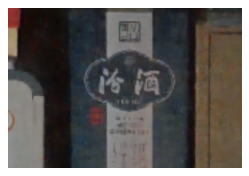

In [13]:
out = plot_1patch(300, 160,  img_55_bad3)

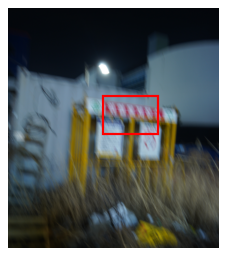

In [52]:
out = plot_1block_realblur(300, 280,  img_13)

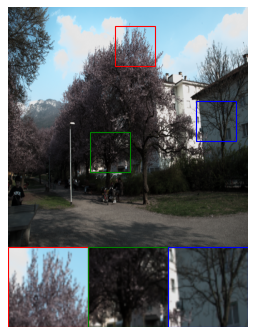

In [41]:
out = plot(170, 30, 130, 200, 300, 150, img_56t)

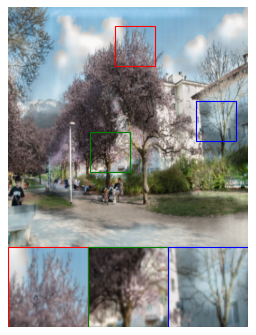

In [212]:
out = plot(170, 30, 130, 200, 300, 150, img_56t_snr)

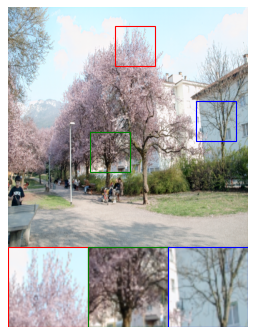

In [109]:
out = plot(170, 30, 130, 200, 300, 150, img_56t_ours)

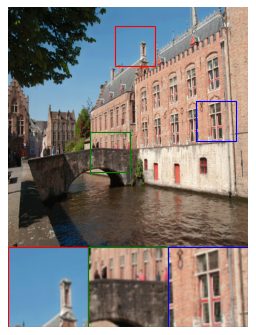

In [222]:
out = plot(170, 30, 130, 200, 300, 150, img_18t_llformer)

In [ ]:
def plot2(x1, y1, x2, y2, x3, y3):
    img_gt = cv2.imread('./LLEsample/lolv2syn_11_gt.png', 1)
    red = img[y1:y1+64, x1:x1+64, :]
    green = img[y2:y2+64, x2: x2+64, :]
    blue = img[y3:y3+64, x3:x3+64, :]
    red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
                       anti_aliasing=True)
    
    green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
                       anti_aliasing=True)
    blue = resize(blue, (blue.shape[0] // 0.5, blue.shape[1] // 0.5),
                       anti_aliasing=True)

    out = np.vstack([img_gt/255, np.hstack([red, green, blue])])
#     cv2.imwrite('detailed.png' ,out)
    # 顯示圖片
    cv2.imshow('My Image', out)

    # 按下任意鍵則關閉所有視窗
    cv2.waitKey(0)
    cv2.destroyAllWindows()
plot2(100, 100, 300, 50, 300, 190)

In [109]:
def plot_1block(x1, y1, img):
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 150, 150, linewidth =2, edgecolor='r',  
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
#     patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
#                         facecolor='none')

    ax.add_patch(patch1)
#     ax.add_patch(patch2)
#     ax.add_patch(patch3)
    
    red = img[y1:y1+150, x1:x1+150, :]
#     green = img[y2:y2+64, x2: x2+64, :]
#     blue = img[y3:y3+50, x3:x3+75, :]
#     red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
#                        anti_aliasing=True)
    red = rescale(red, [3, 3, 1])

    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
#     blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
#                        anti_aliasing=True)

#     out = img.copy()
    
#     out[-150: , -225:, :] = red * 255

#     ax.add_patch(Rectangle((600-225-1, 400-150-1), 225, 150, edgecolor='g',  linewidth =2,
#                         facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
#     ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
#                         facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(img)
    plt.text(60, 100, s='D', color='red', fontsize=20)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(9.0/3,6.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out

In [94]:
def plot_1block(x1, y1, img): #打4个方块在左上角，用于haar wavelet 演示
    fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi = 80)
    patch1 = Rectangle((x1,y1), 75, 75, linewidth =2, edgecolor='r',  
                        facecolor='none')
    patch2 = Rectangle((x1,y1), 150, 75, linewidth =2, edgecolor='r',  
                        facecolor='none')
    patch3 = Rectangle((x1,y1), 75, 150, linewidth =2, edgecolor='r',  
                        facecolor='none')
    patch4 = Rectangle((x1,y1), 150, 150, linewidth =2, edgecolor='r',  
                        facecolor='none')
#     patch2 = Rectangle((x2, y2), 64, 64, edgecolor='g',
#                         facecolor='none')
#     patch3 = Rectangle((x3, y3),75, 50, linewidth =3, edgecolor='b', 
#                         facecolor='none')

    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
#     ax.add_patch(patch2)
#     ax.add_patch(patch3)
    
    red = img[y1:y1+75, x1:x1+75, :]
#     green = img[y2:y2+64, x2: x2+64, :]
#     blue = img[y3:y3+50, x3:x3+75, :]
#     red = resize(red, (red.shape[0] // 0.5, red.shape[1] // 0.5),
#                        anti_aliasing=True)
    red = rescale(red, [3, 3, 1])

    
#     green = resize(green, (green.shape[0] // 0.5, green.shape[1] // 0.5),
#                        anti_aliasing=True)
#     blue = resize(blue, (blue.shape[0] // 0.25, blue.shape[1] // 0.25),
#                        anti_aliasing=True)

#     out = img.copy()
    
#     out[-150: , -225:, :] = red * 255

#     ax.add_patch(Rectangle((600-225-1, 400-150-1), 225, 150, edgecolor='g',  linewidth =2,
#                         facecolor='none'))
#     ax.add_patch(Rectangle((128, 384), 127,127, edgecolor='g',  
#                         facecolor='none'))
#     ax.add_patch(Rectangle((301, 400), 298, 200, edgecolor='b',  linewidth =2,
#                         facecolor='none'))
#     print((255*out).astype(np.uint8))
    
    ax.imshow(img)
    plt.text(20, 55, s='a', color='red', fontsize=20)
    plt.text(95, 55, s='b', color='red', fontsize=20)
    plt.text(20, 130, s='c', color='red', fontsize=20)
    plt.text(95, 130, s='d', color='red', fontsize=20)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(9.0/3,6.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./detailed.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out

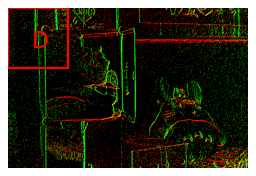

In [110]:
out = plot_1block(0, 0,  wave3)

In [71]:
inp = io.imread('./low/22.png')
wave0 = io.imread( './wave0.png')
wave1 = io.imread( './wave1.png')
wave2 = io.imread( './wave2.png')
wave3 = io.imread( './wave3.png')

### face and sub fig

In [181]:
f1 = io.imread('./face_sub/f1.PNG')
f2 = io.imread('./face_sub/f2.PNG')
f3 = io.imread('./face_sub/f3.PNG')
f4 = io.imread('./face_sub/f4.PNG')
f5 = io.imread('./face_sub/f5.PNG')

s1 = io.imread('./face_sub/s1.PNG')
s2 = io.imread('./face_sub/s2.PNG')
s3 = io.imread('./face_sub/s3.PNG')
# s4 = io.imread('./face_sub/s4.png')
# s5 = io.imread('./face_sub/s5.png')

In [190]:
c1 = io.imread('./cuhk4k/cuhk1.png')
c2 = io.imread('./cuhk4k/cuhk2.png')
c3 = io.imread('./cuhk4k/cuhk3.png')
c4 = io.imread('./cuhk4k/cuhk4.png')
c5 = io.imread('./cuhk4k/cuhk5.png')

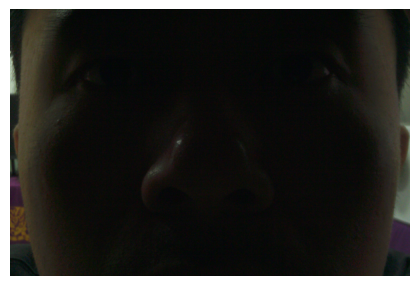

In [167]:
def to_png(img):
    out = img[-400:,-650:-50,: ]

    plt.imshow(out)
    plt.axis('off')
    fig = plt.gcf()
    
    fig.set_size_inches(12.0/3,8.0/3)
#     Image.fromarray((255*out).astype(np.uint8)).save('./detailed.png')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    fig.savefig('./f.png', format='png', transparent=True, dpi=150, pad_inches = 0)
    return out
out=to_png(f1)

In [189]:
Image.fromarray(f2[-400:,-650:-50,:3]).save('./f.png')

In [179]:
io.imread('./f.png').shape

(400, 600, 3)

In [205]:
from skimage.transform import rescale, resize, downscale_local_mean
tmp = (255 * resize(c5, (400, 600), anti_aliasing = True)).astype(np.uint8)
Image.fromarray(tmp).save('./c.png')

In [200]:
resize_c1 * 255

array([[[68.33666385, 78.33666385, 88.33666385],
        [68.57126184, 78.57126184, 88.57126184],
        [68.21943653, 78.21943653, 88.21943653],
        ...,
        [76.49362458, 86.4126138 , 98.65564613],
        [76.3639802 , 86.00166862, 99.08860336],
        [76.13544004, 85.89220613, 98.62190788]],

       [[68.72011547, 78.72011547, 88.72011547],
        [69.4695677 , 79.4695677 , 89.4695677 ],
        [68.71492456, 78.71492456, 88.71492456],
        ...,
        [77.2591087 , 87.18123901, 99.41484807],
        [77.22757314, 86.93468291, 99.8133536 ],
        [75.78638692, 85.44129516, 98.47657046]],

       [[67.3233832 , 77.3233832 , 87.3233832 ],
        [68.6351157 , 78.6351157 , 88.6351157 ],
        [68.39133487, 78.39133487, 88.39133487],
        ...,
        [77.36558884, 87.35237884, 99.39200884],
        [77.54282556, 87.49303795, 99.64240077],
        [76.65337064, 86.60928423, 98.74154346]],

       ...,

       [[ 2.98210873,  2.98210873,  2.98210873],
        [ 2

In [82]:
#flops, psnr in lolv1
flops = [
    [140.99, 22.36], #restormer
    [158.16, 23.5], #maxim
    [11.12, 18.54], #uformer
    [15.97, 22.54], #NAF
    [13.85, 22.74], #llformer
    [17.5, 24.31], #ours
    [140.92, 23.44], #MIRnet
    [170.52, 22.45], #Hinet
    [66.95, 22.35], #mimo-unet
    [16.00, 21.85], #DeepRFT
    
]

/tmp/ipykernel_3031628/1307110563.py:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 180, 20)
/tmp/ipykernel_3031628/1307110563.py:17: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(18, 25, 1)


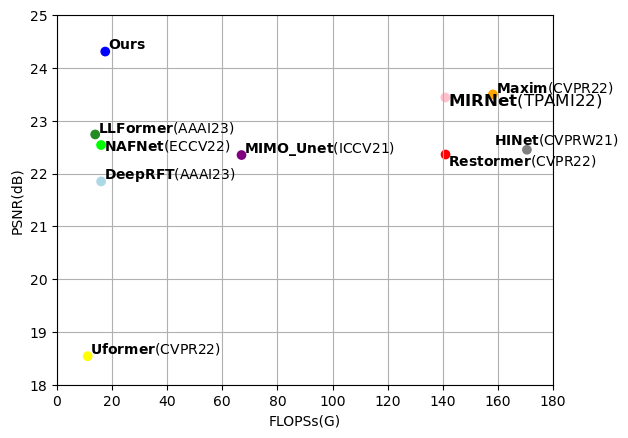

In [90]:
flops = np.array(flops)
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#228B22', 'blue', 'pink', 'gray', 'purple', 'lightblue']
names = ['$\mathbf{Restormer}$(CVPR22)', '$\mathbf{Maxim}$(CVPR22)', '$\mathbf{Uformer}$(CVPR22)', '$\mathbf{NAFNet}$(ECCV22)', '$\mathbf{LLFormer}$(AAAI23)', '$\mathbf{Ours}$', '$\mathbf{MIRNet}$(TPAMI22)', '$\mathbf{HINet}$(CVPRW21)', '$\mathbf{MIMO\_Unet}$(ICCV21)', '$\mathbf{DeepRFT}$(AAAI23)']
for i in range(len(flops)):
    if i==0:
        plt.annotate(names[i], xy = (flops[i, 0], flops[i, 1]), xytext = (flops[i, 0]+1, flops[i, 1]-0.2))
    elif i==3:
        plt.annotate(names[i], xy = (flops[i, 0], flops[i, 1]), xytext = (flops[i, 0]+1, flops[i, 1]-0.1))
    
    elif i==6:
        plt.annotate(names[i], xy = (flops[i, 0], flops[i, 1]), xytext = (flops[i, 0]+1, flops[i, 1]-0.15))
    elif i==7:
        plt.annotate(names[i], xy = (flops[i, 0], flops[i, 1]), xytext = (flops[i, 0]-12, flops[i, 1]+0.1))
    else:
        plt.annotate(names[i], xy = (flops[i, 0], flops[i, 1]), xytext = (flops[i, 0]+1, flops[i, 1]+0.05))
plt.scatter(flops[:, 0], flops[ :, 1], c=colors)
plt.xlim(0, 180, 20)
plt.ylim(18, 25, 1)
plt.xlabel('FLOPSs(G)')
plt.ylabel('PSNR(dB)')
plt.grid()
plt.savefig('./psnr_compare.jpg')

In [ ]:
import torch
from torchvision import models
from sklearn.cross_decomposition import CCA

# Load a pre-trained model
model = models.resnet18(pretrained=True)
model.eval()

# Select layers for CCA comparison
layer1 = model.layer1[0].conv1
layer2 = model.layer2[0].conv1

# Placeholder to store intermediate feature maps
features1 = []
features2 = []

# Hook to capture feature maps
def hook1(module, input, output):
    features1.append(output)
    
def hook2(module, input, output):
    features2.append(output)

# Register hooks to the selected layers
hook_handle1 = layer1.register_forward_hook(hook1)
hook_handle2 = layer2.register_forward_hook(hook2)

# Input image
input_image = torch.randn(1, 3, 224, 224)

# Forward pass
model(input_image)

# Unregister hooks
hook_handle1.remove()
hook_handle2.remove()

# Convert feature maps to matrices
features1_matrix = torch.cat([f.view(f.size(0), -1) for f in features1], dim=1)
features2_matrix = torch.cat([f.view(f.size(0), -1) for f in features2], dim=1)

# Apply CCA
cca = CCA(n_components=1)
cca.fit(features1_matrix.T, features2_matrix.T)

# Get the canonical correlations
cca_corr = cca.cancorrs_[0]

print("Canonical Correlation:", cca_corr)
